# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [53]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [54]:
# STEPS

# Plot the LABEL data as a histogram/boxplot to show its distribution.

# Remove the outliers from the dataset manually by filters
# E.g. data = data[ data[ 'price_per_unit' ] < 70 ]
# 
# ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
# ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
# df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
# df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]
#
# Plot again to confirm outliers have been removed.

# Find the features
# Numeric - Plot the column as a scatterplot to see possible correlations
# Categorical - Plot the column as a boxplot to see possible correlations
# Include only columns that seem to have correlations

# Separate features and label
# X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values
#
# Split data into training and validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Preprocess data and train a model in a PIPELINE
# normalize the numeric features
# create model

c:\Users\Justin W\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


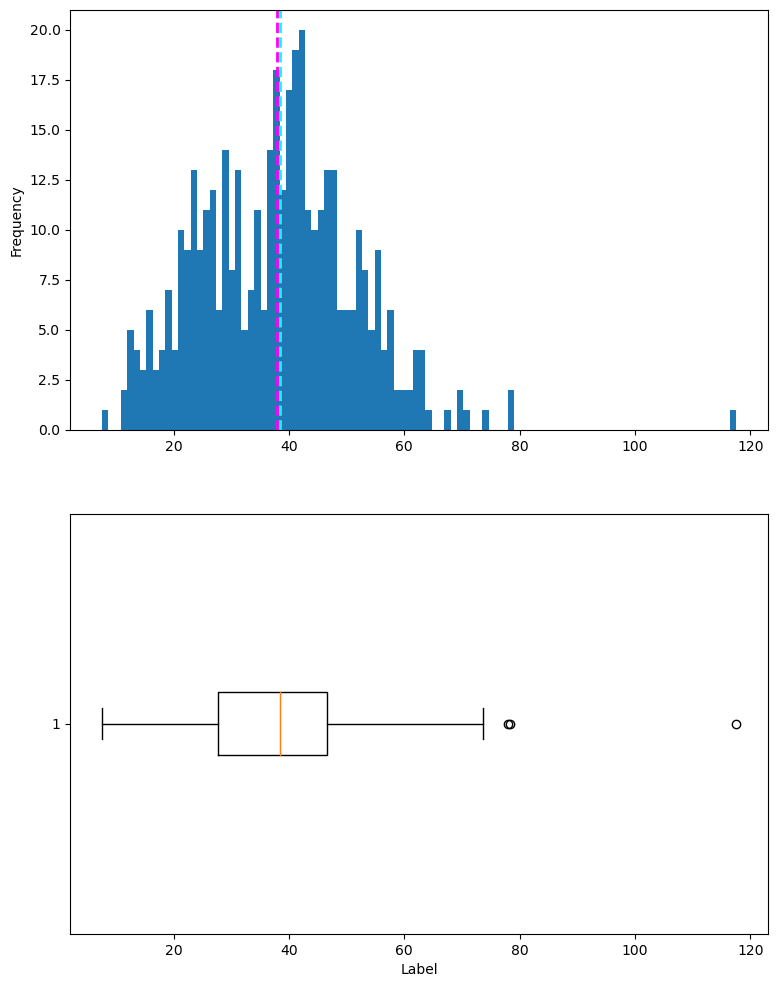

In [55]:
# Your code to explore data and train a regression model
import matplotlib.pyplot as plt

label = data['price_per_unit']

fig, ax = plt.subplots( 2, 1, figsize = (9, 12))

# Histogram
ax[0].hist( label, bins=100 )
ax[0].set_ylabel( 'Frequency' )
# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

fig.show()

c:\Users\Justin W\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


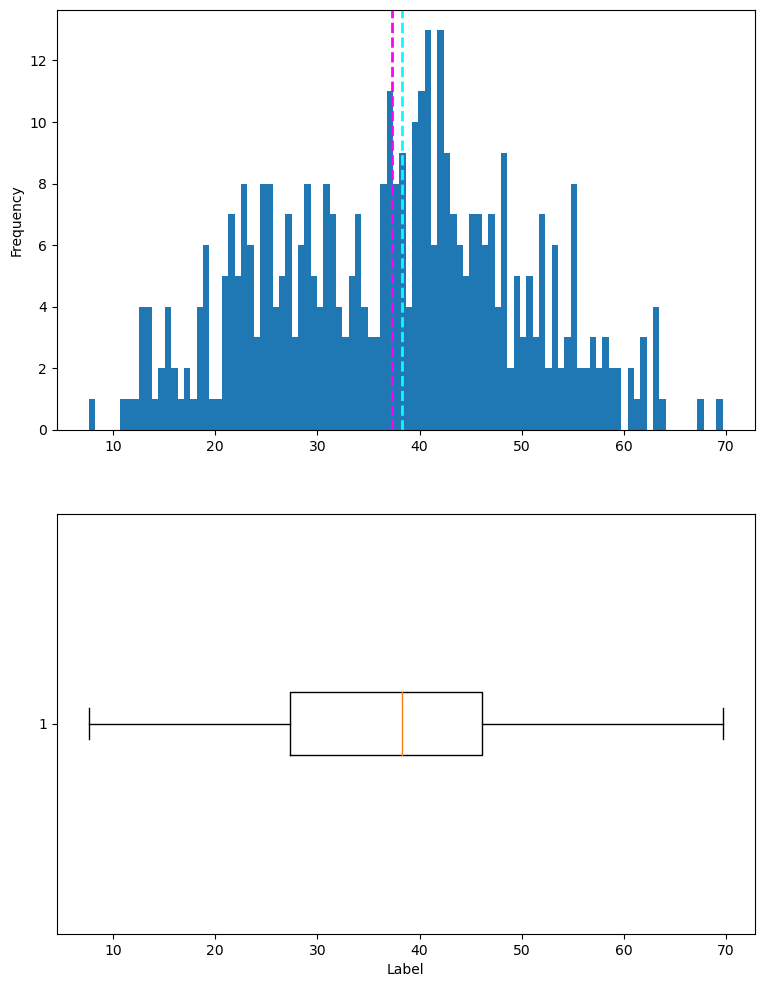

In [56]:
data = data[data['price_per_unit']<70]

# Redeclare the label data after filtering
label = data['price_per_unit']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot( label, vert=False )
ax[1].set_xlabel( 'Label' )

fig.show()


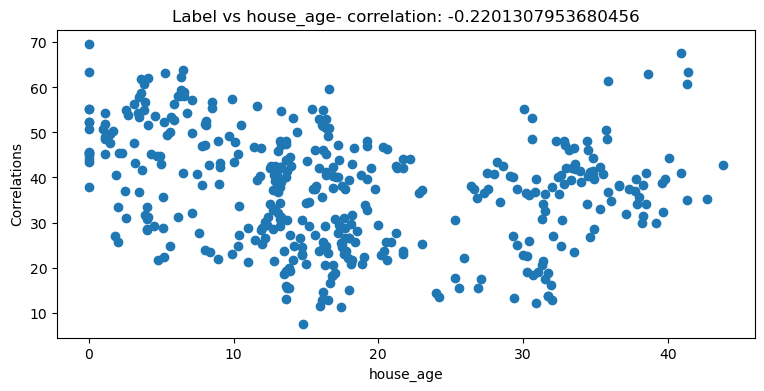

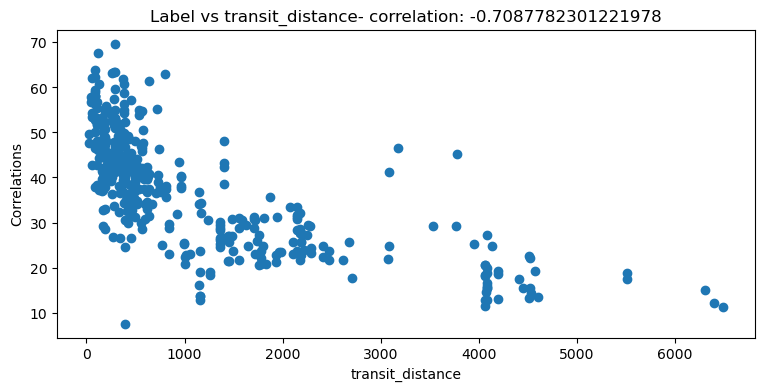

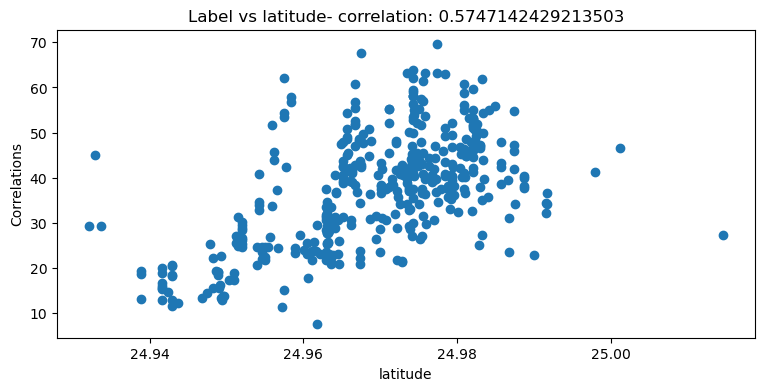

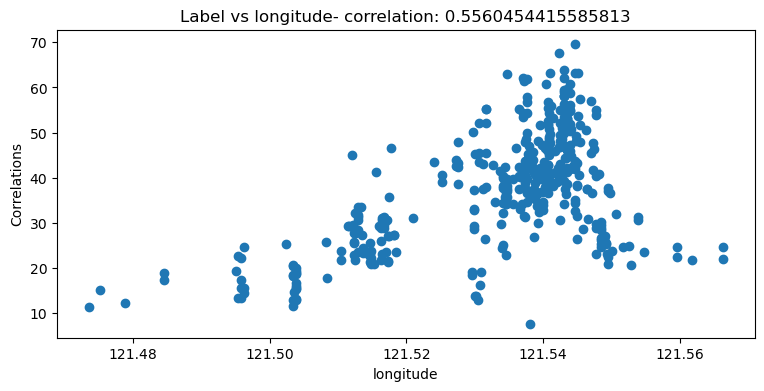

In [57]:
numeric_columns = [ 'house_age', 'transit_distance', 'latitude', 'longitude' ]
categorical_columns = [ 'transaction_date', 'local_convenience_stores' ]

for col_name in numeric_columns:
    fig = plt.figure(figsize=(9, 4))
    ax = fig.gca()
    feature = data[col_name]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col_name)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col_name + '- correlation: ' + str(correlation))

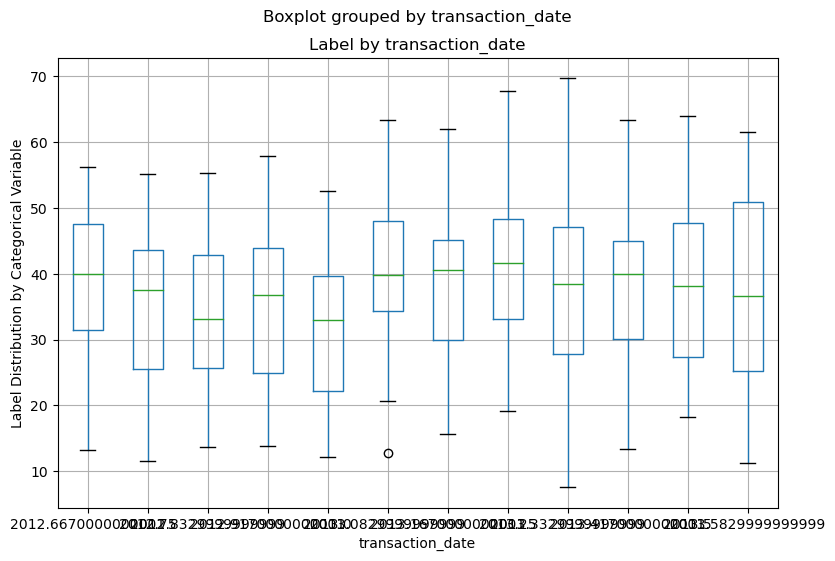

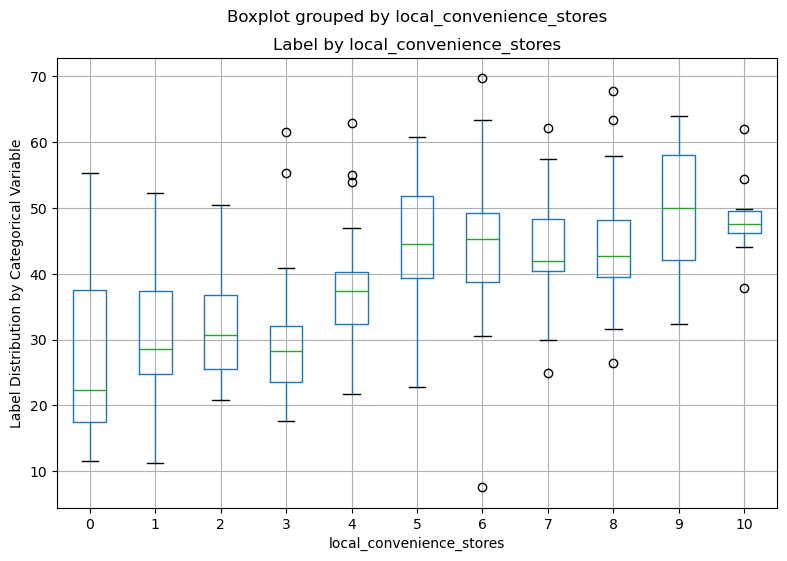

In [58]:
# plot a boxplot for the label by each categorical feature
for col_name in categorical_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col_name, ax = ax)
    ax.set_title('Label by ' + col_name)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()

In [59]:
# Determine what are features and what are not.

# Other than transaction_date, other columns look like they have correlation.T
# Then separate features and the Label.
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values

from sklearn.model_selection import train_test_split

# Split dataset into 70% training set and 30% testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)



In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train the model.

# Define preprocessing for numeric columns
numeric_features =    [0, 1, 3, 4 ]
numeric_transformer = Pipeline( 
    steps = [ ( 'scaler', StandardScaler() ) ] 
    )

preprocessor = ColumnTransformer(
    transformers = [ ( 'num' , numeric_transformer, numeric_features ) ]
)

# Create preprocessing and training pipeline
pipeline = Pipeline( 
    steps = [   ( 'preprocessor', preprocessor),
                ( 'regressor', RandomForestRegressor() ) ] 
    )

model = pipeline.fit( X_train, ( y_train ) )

MSE: 36.79770565912182
RMSE: 6.066111246846848
R2: 0.6860035154877878


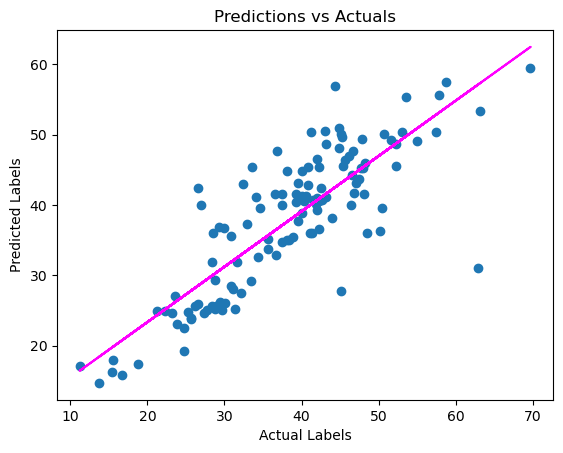

In [61]:
# Evaluate the model

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions
predictions = model.predict( X_test )

# Display metrics
mse = mean_squared_error( y_test, predictions )
rmse = np.sqrt( mse )
r2 = r2_score( y_test, predictions )
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [63]:
# USING the trained model

import joblib

# save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump( model, filename )

# Load the model from the file
my_model = joblib.load( filename )

# Load data for new dataset
X_new = np.array( [ [16.2,289.3248, 5, 24.98203, 121.54348 ],
                    [13.6, 4082.015, 0, 24.94155, 121.5038 ] ]
                  )

# Use the model
results = my_model.predict( X_new )
for prediction in results:
    print(round(prediction,2))

49.17
16.29
